In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
dfvg = pd.read_csv(r'D:\Python\Alex\Files\vgsales.csv')

new_columns = ['job', 'fname', 'location', 'via', 'schedule', 'remote','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                                                # converting the column from string format to date time format
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)                       # converts job_skills from sting to list
#df.dropna(subset=['salyr'],inplace=True)

##### prob 7

###### <pre> get a scatter plot for skills for data analyst with job count as x axis and median salary as y axis 

###### solution

In [3]:
df_7 = df.copy()
df_7 = df_7[df_7['job']== 'Data Analyst'].explode('skills')

df_7 = df_7.groupby('skills').agg(
    sal_median = ('salyr','median'),                                                                                # creating new column named 'median salary' with median of salary_year_avg as data
    skillcount = ('job','count')                                                                                    # creating new column named 'skill count '  with count  of job_skills       as data
)

df_7 = df_7.sort_values(by= 'skillcount',ascending=False).head(10)
df_7

,sal_median,skillcount
skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


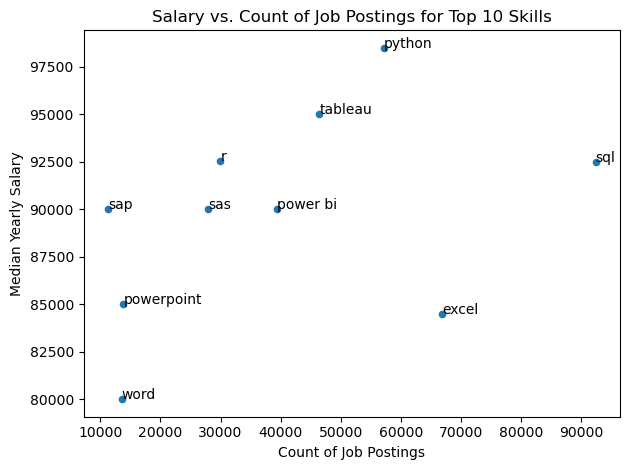

In [4]:
df_7.plot(kind='scatter', x= 'skillcount', y='sal_median')

for i,txt in enumerate(df_7.index):                                                                               # plt.text() function to label the points
    plt.text(df_7['skillcount'].iloc[i], df_7['sal_median'].iloc[i], txt)                                        # plt.text(x point, y point, 'text')

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()